# Examples of plotting predictions of decision trees on a map

In [28]:
# Loading packages
library('dplyr')
library(caret)
library('rpart.plot')
library('RColorBrewer')
library(rpart)

library('rworldmap')
library('rworldxtra')


### Decision tree with climatic averages

In [7]:
# Reading current climate and vegetation data_current
data_current <- read.csv2('BIOCLIM_CEI_MODIS.csv')

# Finding a dominant vegetation type in each grid cell
modis_dominant <- apply(data_current[,c('c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7',
                                'c8', 'c9', 'c10', 'c11', 'c15', 'c16')],
                        1, function(x) {which.max(x)})



# Converting modis_dominant variable into a factor
modis_dominant <- factor(modis_dominant, levels=1:13, 
                         labels = c('ENF','EBF','DNF','DBF','MF',
                                    'ClosedShrubland','OpenShrubland',
                                     'WoodySavanna','Savanna','Grassland',
                                     'Wetland','SnowAndIce','Barren' ))

# Adding dominant class column to the initial data_current.frame
data_current <- cbind(data_current, modis_dominant)



# Reading future climate data

data_future_rcp26_50 <- read.csv2('future_rcp26_50.csv')
data_future_rcp26_70 <- read.csv2('future_rcp26_70.csv')

data_future_rcp45_50 <- read.csv2('future_rcp45_50.csv')
data_future_rcp45_70 <- read.csv2('future_rcp45_70.csv')

data_future_rcp85_50 <- read.csv2('future_rcp85_50.csv')
data_future_rcp85_70 <- read.csv2('future_rcp85_70.csv')


In [8]:
### Building decision tree model (with climatic averages only)

# Selecting columns for average model training
train_average <- data_current %>% 
        select('bio1', 'bio2', 'bio3', 'bio5', 'bio6', 'bio8', 'bio9',
               'bio10', 'bio11', 'bio12', 'bio13', 'bio14',
               'bio16', 'bio17', 'bio18', 'bio19', 'modis_dominant')


# Training decision tree on full data_current set
average.model <- rpart(modis_dominant ~., data = train_average,
                       method = 'class',
                       parms=list(split='gini'),
                       control = rpart.control(cp = 0.005))


In [14]:
# Using the average tree model for predicting (classifying) current vegetation types
pred_current <- predict(average.model, train_average, type = c("class"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



null device 
          1

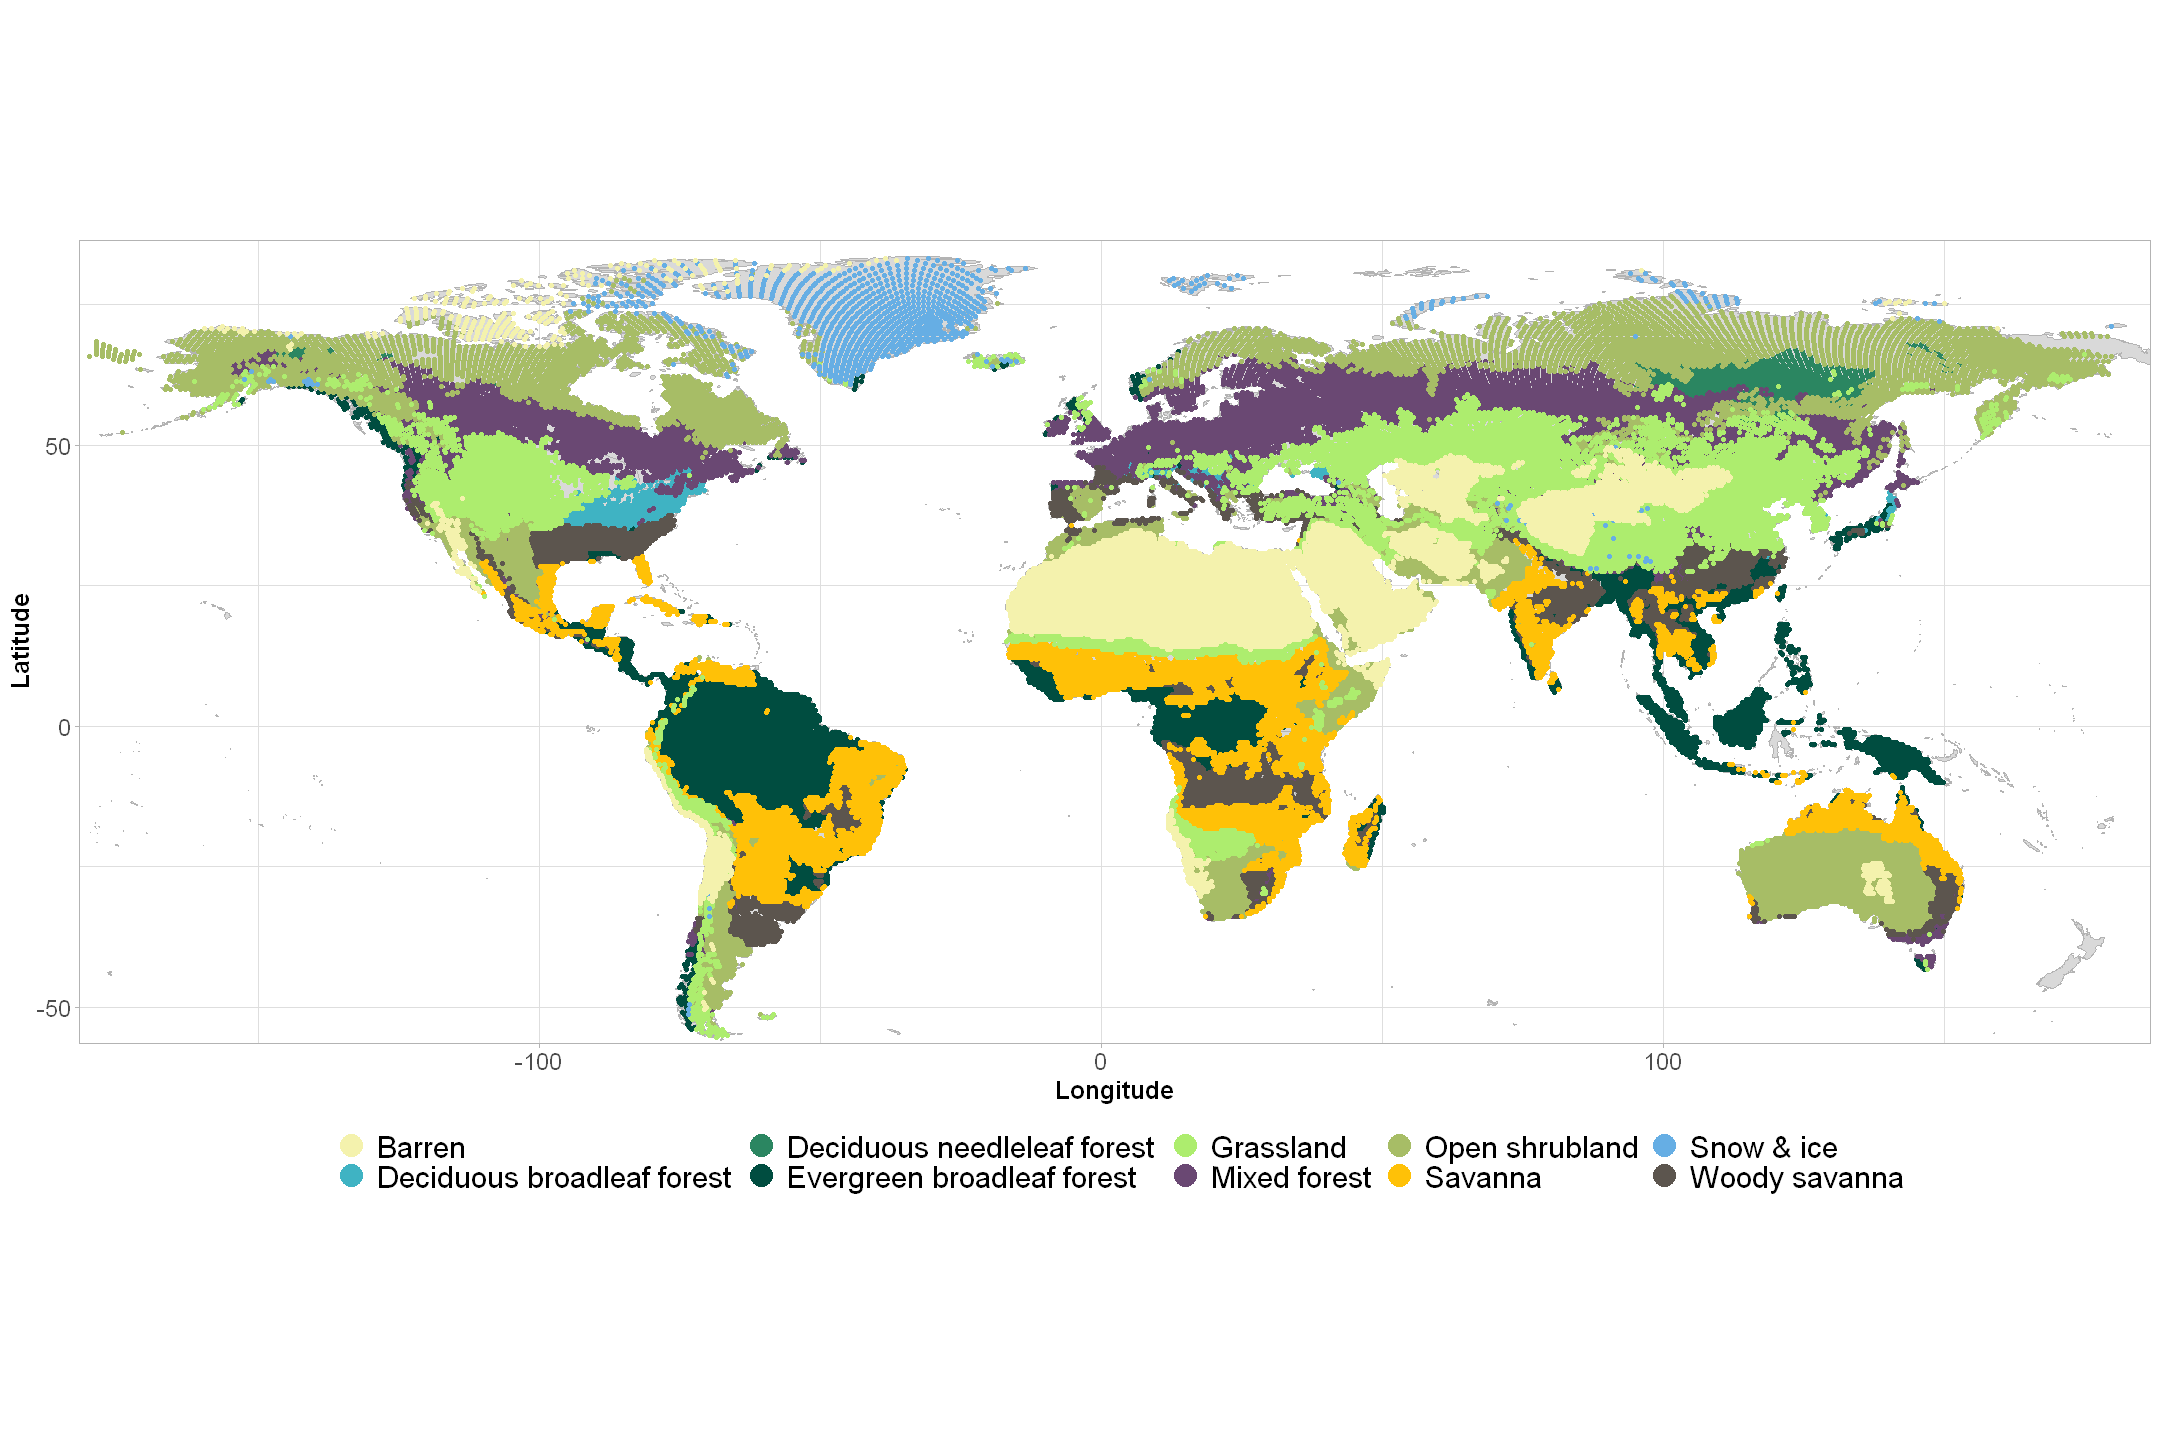

In [56]:
# Plotting a map of the average tree prediction of current data
options(repr.plot.width=18, repr.plot.height=12)

cols <- c("Evergreen broadleaf forest" ='#004D40',
          "Evergreen needleleaf forest"= '#37F0B8',
         'Deciduous needleleaf forest'= '#2B8661',
          'Deciduous broadleaf forest'= '#3FB3C3',
          'Mixed forest'= '#6A4873',
          'Open shrubland'= '#A7BD66',
          'Woody savanna'= '#5C554E',
          'Savanna'= '#FFC107',
          'Grassland'= '#ADED6E',
          'Snow & ice'= '#66AEE4',
          'Barren'= '#F4F2AD')
         


mapWorld <- map_data('world')
ggplot() +
geom_polygon(data = mapWorld, aes(x=long, y = lat, group = group), col='grey70', fill ='grey85') + coord_equal()+
geom_point(data = data_current[pred_current=='EBF',], aes(x = lon, y = lat, colour = "Evergreen broadleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='DNF',], aes(x = lon, y = lat, colour = 'Deciduous needleleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='DBF',], aes(x = lon, y = lat, colour = 'Deciduous broadleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='MF',], aes(x = lon, y = lat, colour = 'Mixed forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='OpenShrubland',], aes(x = lon, y = lat, colour = 'Open shrubland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='WoodySavanna',], aes(x = lon, y = lat, colour = 'Woody savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='Savanna',], aes(x = lon, y = lat, colour = 'Savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='Grassland',], aes(x = lon, y = lat, colour = 'Grassland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='SnowAndIce',], aes(x = lon, y = lat, colour = 'Snow & ice'),shape=16, size = 1)+
geom_point(data = data_current[pred_current=='Barren',], aes(x = lon, y = lat, colour = 'Barren'),shape=16, size = 1)+
ylab('Latitude')+
xlab('Longitude')+
theme_light()+
coord_fixed(xlim = c(-165, 170), ylim = c(-50, 80)) +
scale_colour_manual(name="",values=cols)+ theme(plot.title = element_text(hjust = 0.5,size = 30, face = "bold"),
                                                legend.position="bottom")+
theme(axis.text=element_text(size=14), axis.title=element_text(size=15,face="bold")) + 
theme(legend.text=element_text(size=18), legend.title=element_text(size=14)) + 
guides(colour = guide_legend(override.aes = list(shape = 16,size=6)))


In [58]:
# Using the average tree model for predicting (classifying) future vegetation types
# E.g., for 'future_rcp85_70.csv' data

pred_current_rcp85 <- predict(average.model, data_future_rcp85_70, type = c("class"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



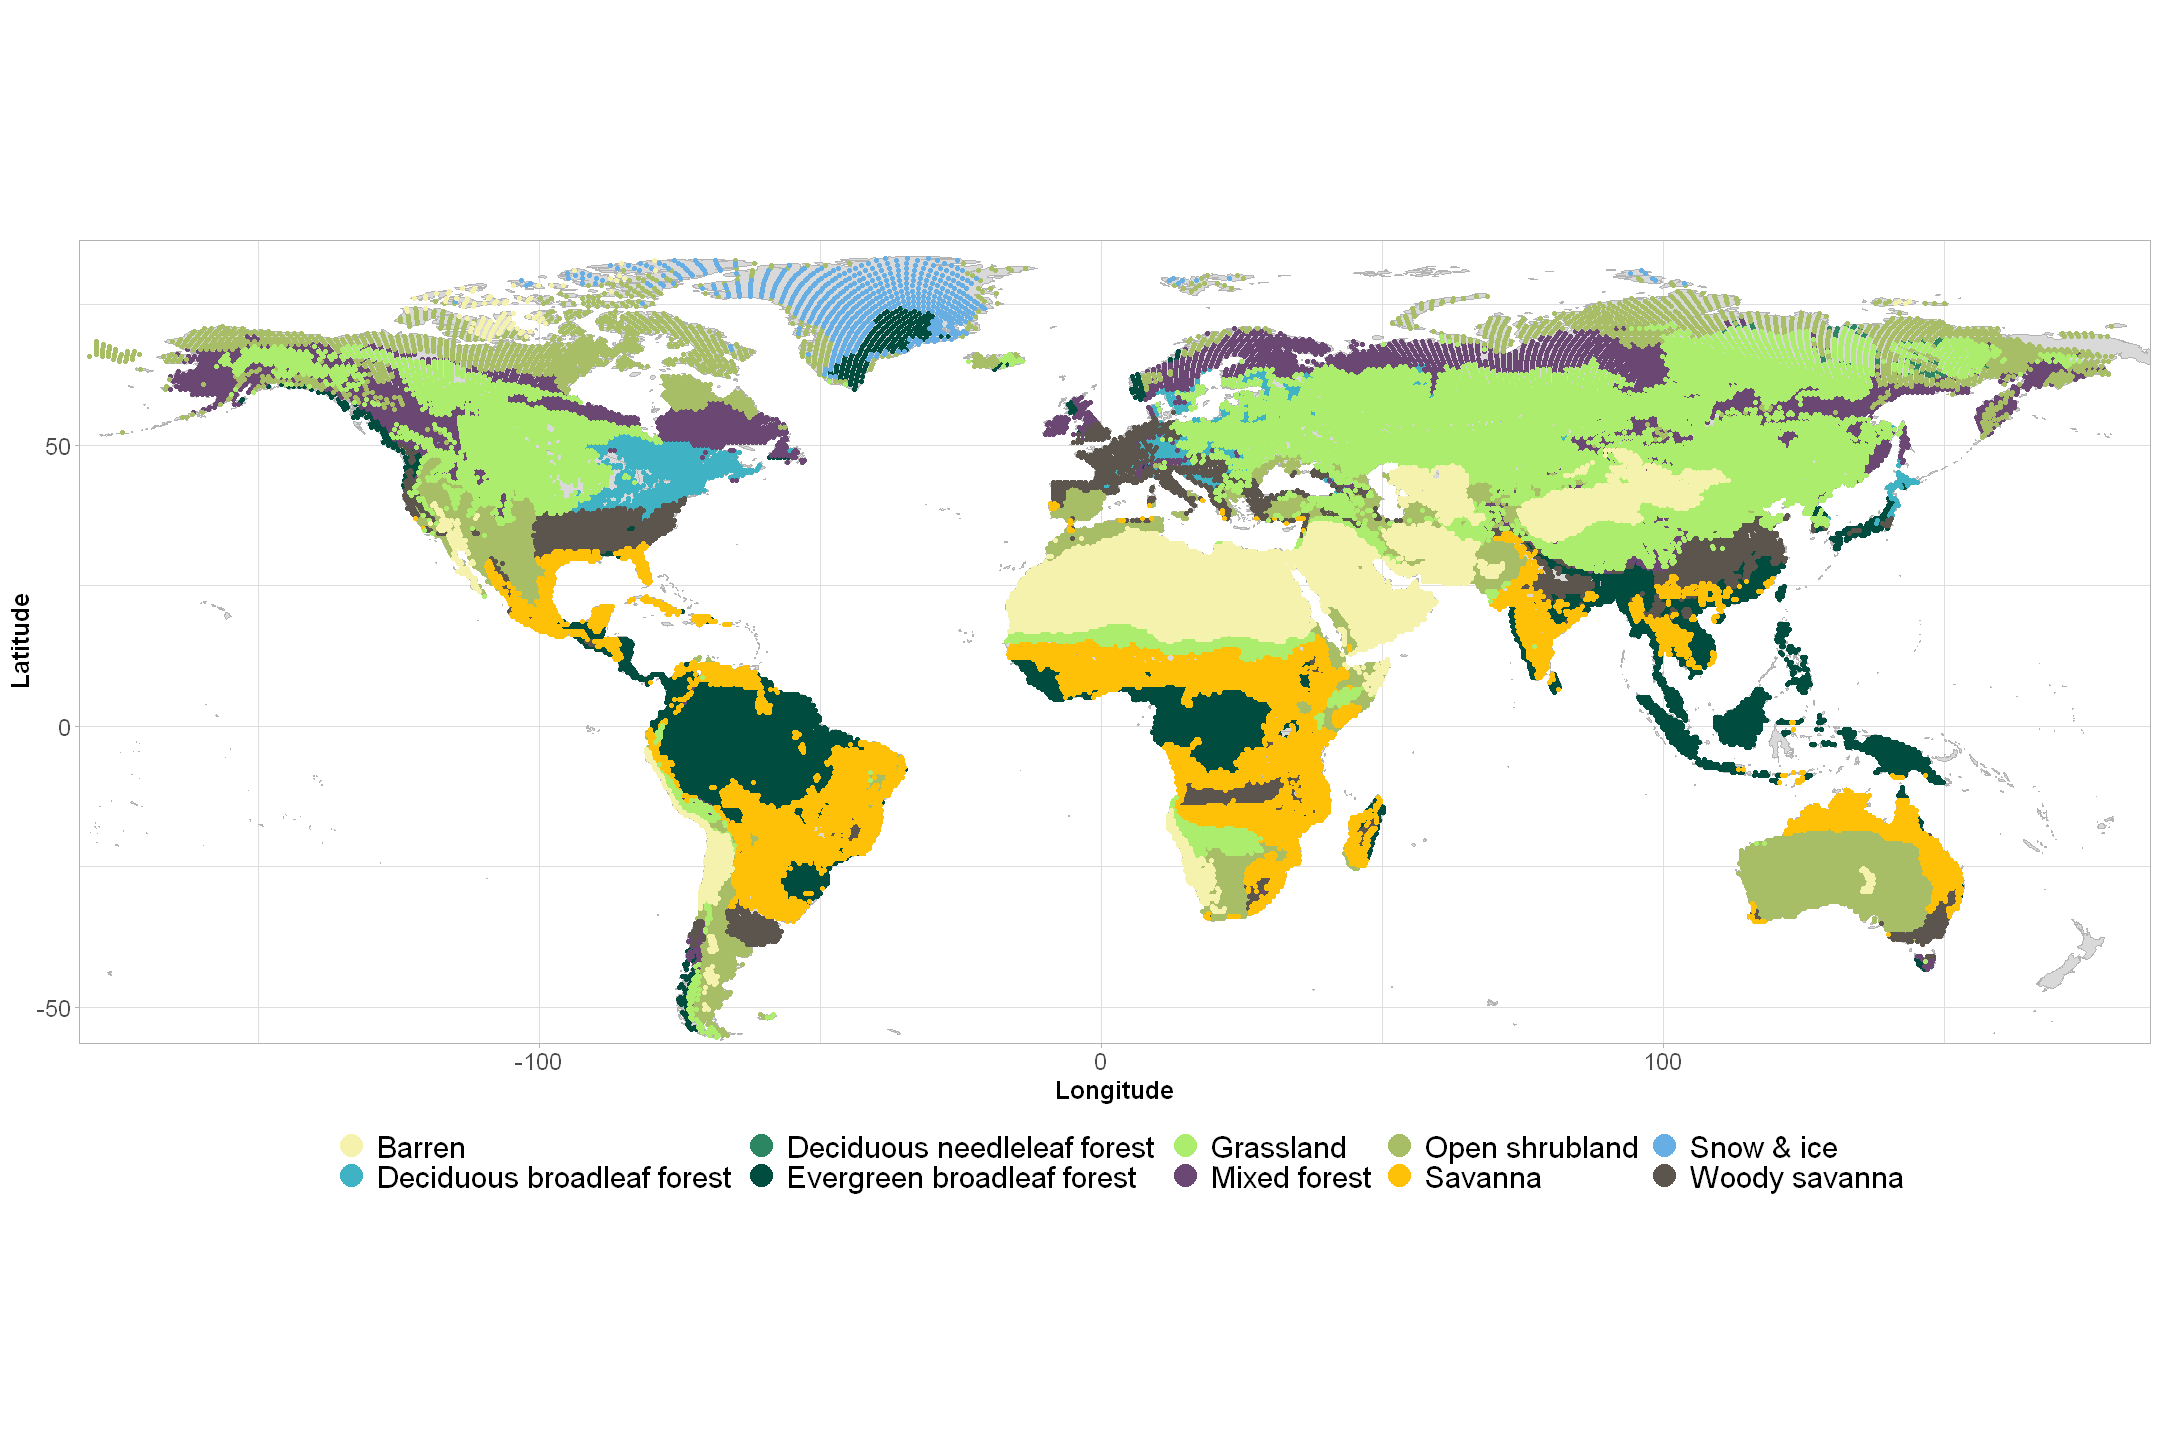

In [60]:
# Plotting a map of the average tree prediction of rcp 8.5 scenario (70 years ahead) data
options(repr.plot.width=18, repr.plot.height=12)

cols <- c("Evergreen broadleaf forest" ='#004D40',
          "Evergreen needleleaf forest"= '#37F0B8',
         'Deciduous needleleaf forest'= '#2B8661',
          'Deciduous broadleaf forest'= '#3FB3C3',
          'Mixed forest'= '#6A4873',
          'Open shrubland'= '#A7BD66',
          'Woody savanna'= '#5C554E',
          'Savanna'= '#FFC107',
          'Grassland'= '#ADED6E',
          'Snow & ice'= '#66AEE4',
          'Barren'= '#F4F2AD')
         


mapWorld <- map_data('world')
ggplot() +
geom_polygon(data = mapWorld, aes(x=long, y = lat, group = group), col='grey70', fill ='grey85') + coord_equal()+
geom_point(data = data_current[pred_current_rcp85=='EBF',], aes(x = lon, y = lat, colour = "Evergreen broadleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='DNF',], aes(x = lon, y = lat, colour = 'Deciduous needleleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='DBF',], aes(x = lon, y = lat, colour = 'Deciduous broadleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='MF',], aes(x = lon, y = lat, colour = 'Mixed forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='OpenShrubland',], aes(x = lon, y = lat, colour = 'Open shrubland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='WoodySavanna',], aes(x = lon, y = lat, colour = 'Woody savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='Savanna',], aes(x = lon, y = lat, colour = 'Savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='Grassland',], aes(x = lon, y = lat, colour = 'Grassland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='SnowAndIce',], aes(x = lon, y = lat, colour = 'Snow & ice'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_rcp85=='Barren',], aes(x = lon, y = lat, colour = 'Barren'),shape=16, size = 1)+
ylab('Latitude')+
xlab('Longitude')+
theme_light()+
coord_fixed(xlim = c(-165, 170), ylim = c(-50, 80)) +
scale_colour_manual(name="",values=cols)+ theme(plot.title = element_text(hjust = 0.5,size = 30, face = "bold"),
                                                legend.position="bottom")+
theme(axis.text=element_text(size=14), axis.title=element_text(size=15,face="bold")) + 
theme(legend.text=element_text(size=18), legend.title=element_text(size=14)) + 
guides(colour = guide_legend(override.aes = list(shape = 16,size=6)))


### Decision tree with climatic extremes

In [61]:
### Building decision tree model (with climatic averages and extremes)
#---------------------------------#

# Selecting columns for extreme model training
train_extreme <- data_current %>% 
        select('bio1', 'bio2','bio3', 'bio5', 'bio6', 'bio8', 'bio9',
               'bio10', 'bio11', 'bio12', 'bio13', 'bio14',
               'bio16', 'bio17', 'bio18', 'bio19', 'CDD', 'CSDI', 'CWD',
               'DTR', 'FD', 'GSL', 'ID', 'PRCPTOT', 'R10mm', 'R1mm',
               'R20mm', 'R95p', 'R99p', 'Rx1day', 'Rx5day', 'SDII', 'SU',
               'TN10p', 'TN90p', 'TNn', 'TNx', 'TR', 'TX10p',
               'TX90p', 'TXn', 'TXx', 'WSDI', 'modis_dominant')


# Training decision tree on full data_current set
extreme.model <- rpart(modis_dominant ~., data = train_extreme,
                       method = 'class',
                       parms=list(split='gini'),
                       control = rpart.control(cp = 0.005))


In [63]:
# Using the average tree model for predicting (classifying) current vegetation types
pred_current_ex <- predict(extreme.model, data_current, type = c("class"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



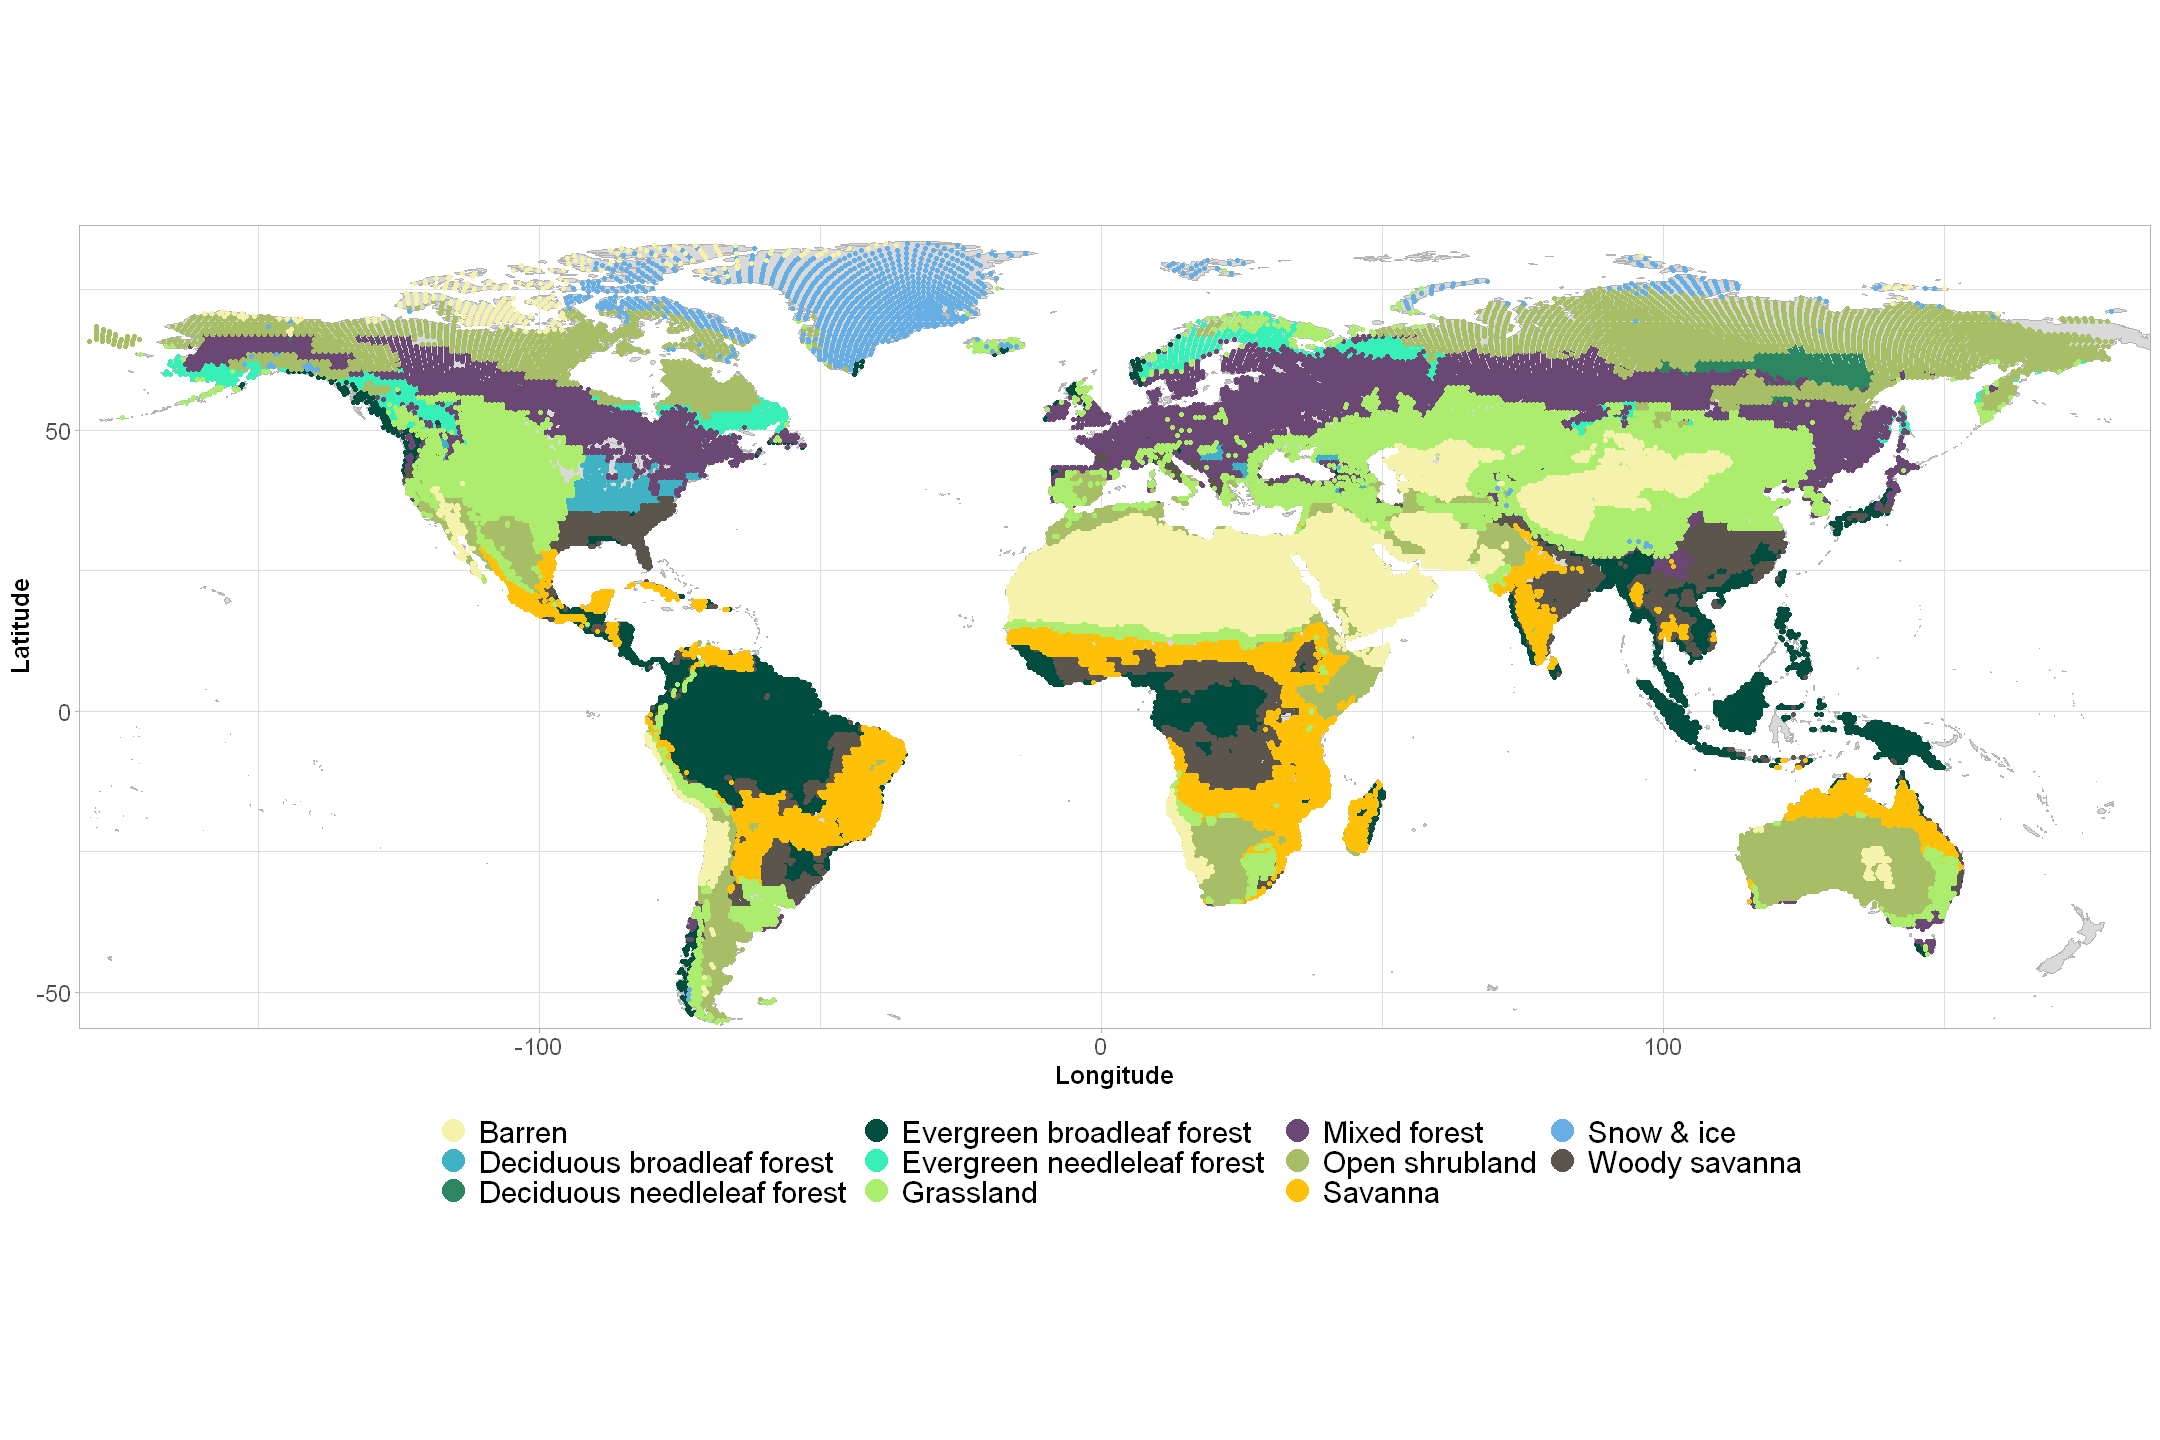

In [65]:
# Plotting a map of the extreme tree predictions of current data
options(repr.plot.width=18, repr.plot.height=12)

cols <- c("Evergreen broadleaf forest" ='#004D40',
          "Evergreen needleleaf forest"= '#37F0B8',
         'Deciduous needleleaf forest'= '#2B8661',
          'Deciduous broadleaf forest'= '#3FB3C3',
          'Mixed forest'= '#6A4873',
          'Open shrubland'= '#A7BD66',
          'Woody savanna'= '#5C554E',
          'Savanna'= '#FFC107',
          'Grassland'= '#ADED6E',
          'Snow & ice'= '#66AEE4',
          'Barren'= '#F4F2AD')
         


mapWorld <- map_data('world')
ggplot() +
geom_polygon(data = mapWorld, aes(x=long, y = lat, group = group), col='grey70', fill ='grey85') + coord_equal()+
geom_point(data = data_current[pred_current_ex=='ENF',], aes(x = lon, y = lat, colour = "Evergreen needleleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='EBF',], aes(x = lon, y = lat, colour = "Evergreen broadleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='DNF',], aes(x = lon, y = lat, colour = 'Deciduous needleleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='DBF',], aes(x = lon, y = lat, colour = 'Deciduous broadleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='MF',], aes(x = lon, y = lat, colour = 'Mixed forest'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='OpenShrubland',], aes(x = lon, y = lat, colour = 'Open shrubland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='WoodySavanna',], aes(x = lon, y = lat, colour = 'Woody savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='Savanna',], aes(x = lon, y = lat, colour = 'Savanna'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='Grassland',], aes(x = lon, y = lat, colour = 'Grassland'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='SnowAndIce',], aes(x = lon, y = lat, colour = 'Snow & ice'),shape=16, size = 1)+
geom_point(data = data_current[pred_current_ex=='Barren',], aes(x = lon, y = lat, colour = 'Barren'),shape=16, size = 1)+
ylab('Latitude')+
xlab('Longitude')+
theme_light()+
coord_fixed(xlim = c(-165, 170), ylim = c(-50, 80)) +
scale_colour_manual(name="",values=cols)+ theme(plot.title = element_text(hjust = 0.5,size = 30, face = "bold"),
                                                legend.position="bottom")+
theme(axis.text=element_text(size=14), axis.title=element_text(size=15,face="bold")) + 
theme(legend.text=element_text(size=18), legend.title=element_text(size=14)) + 
guides(colour = guide_legend(override.aes = list(shape = 16,size=6)))

### Map of each leaf node of a decision tree

In [92]:
#Finding the leaf node numbers of the decision tree (with climatic extremes)
modis_nodes <- rpart.predict(extreme.model, data_current, nn=TRUE)$nn

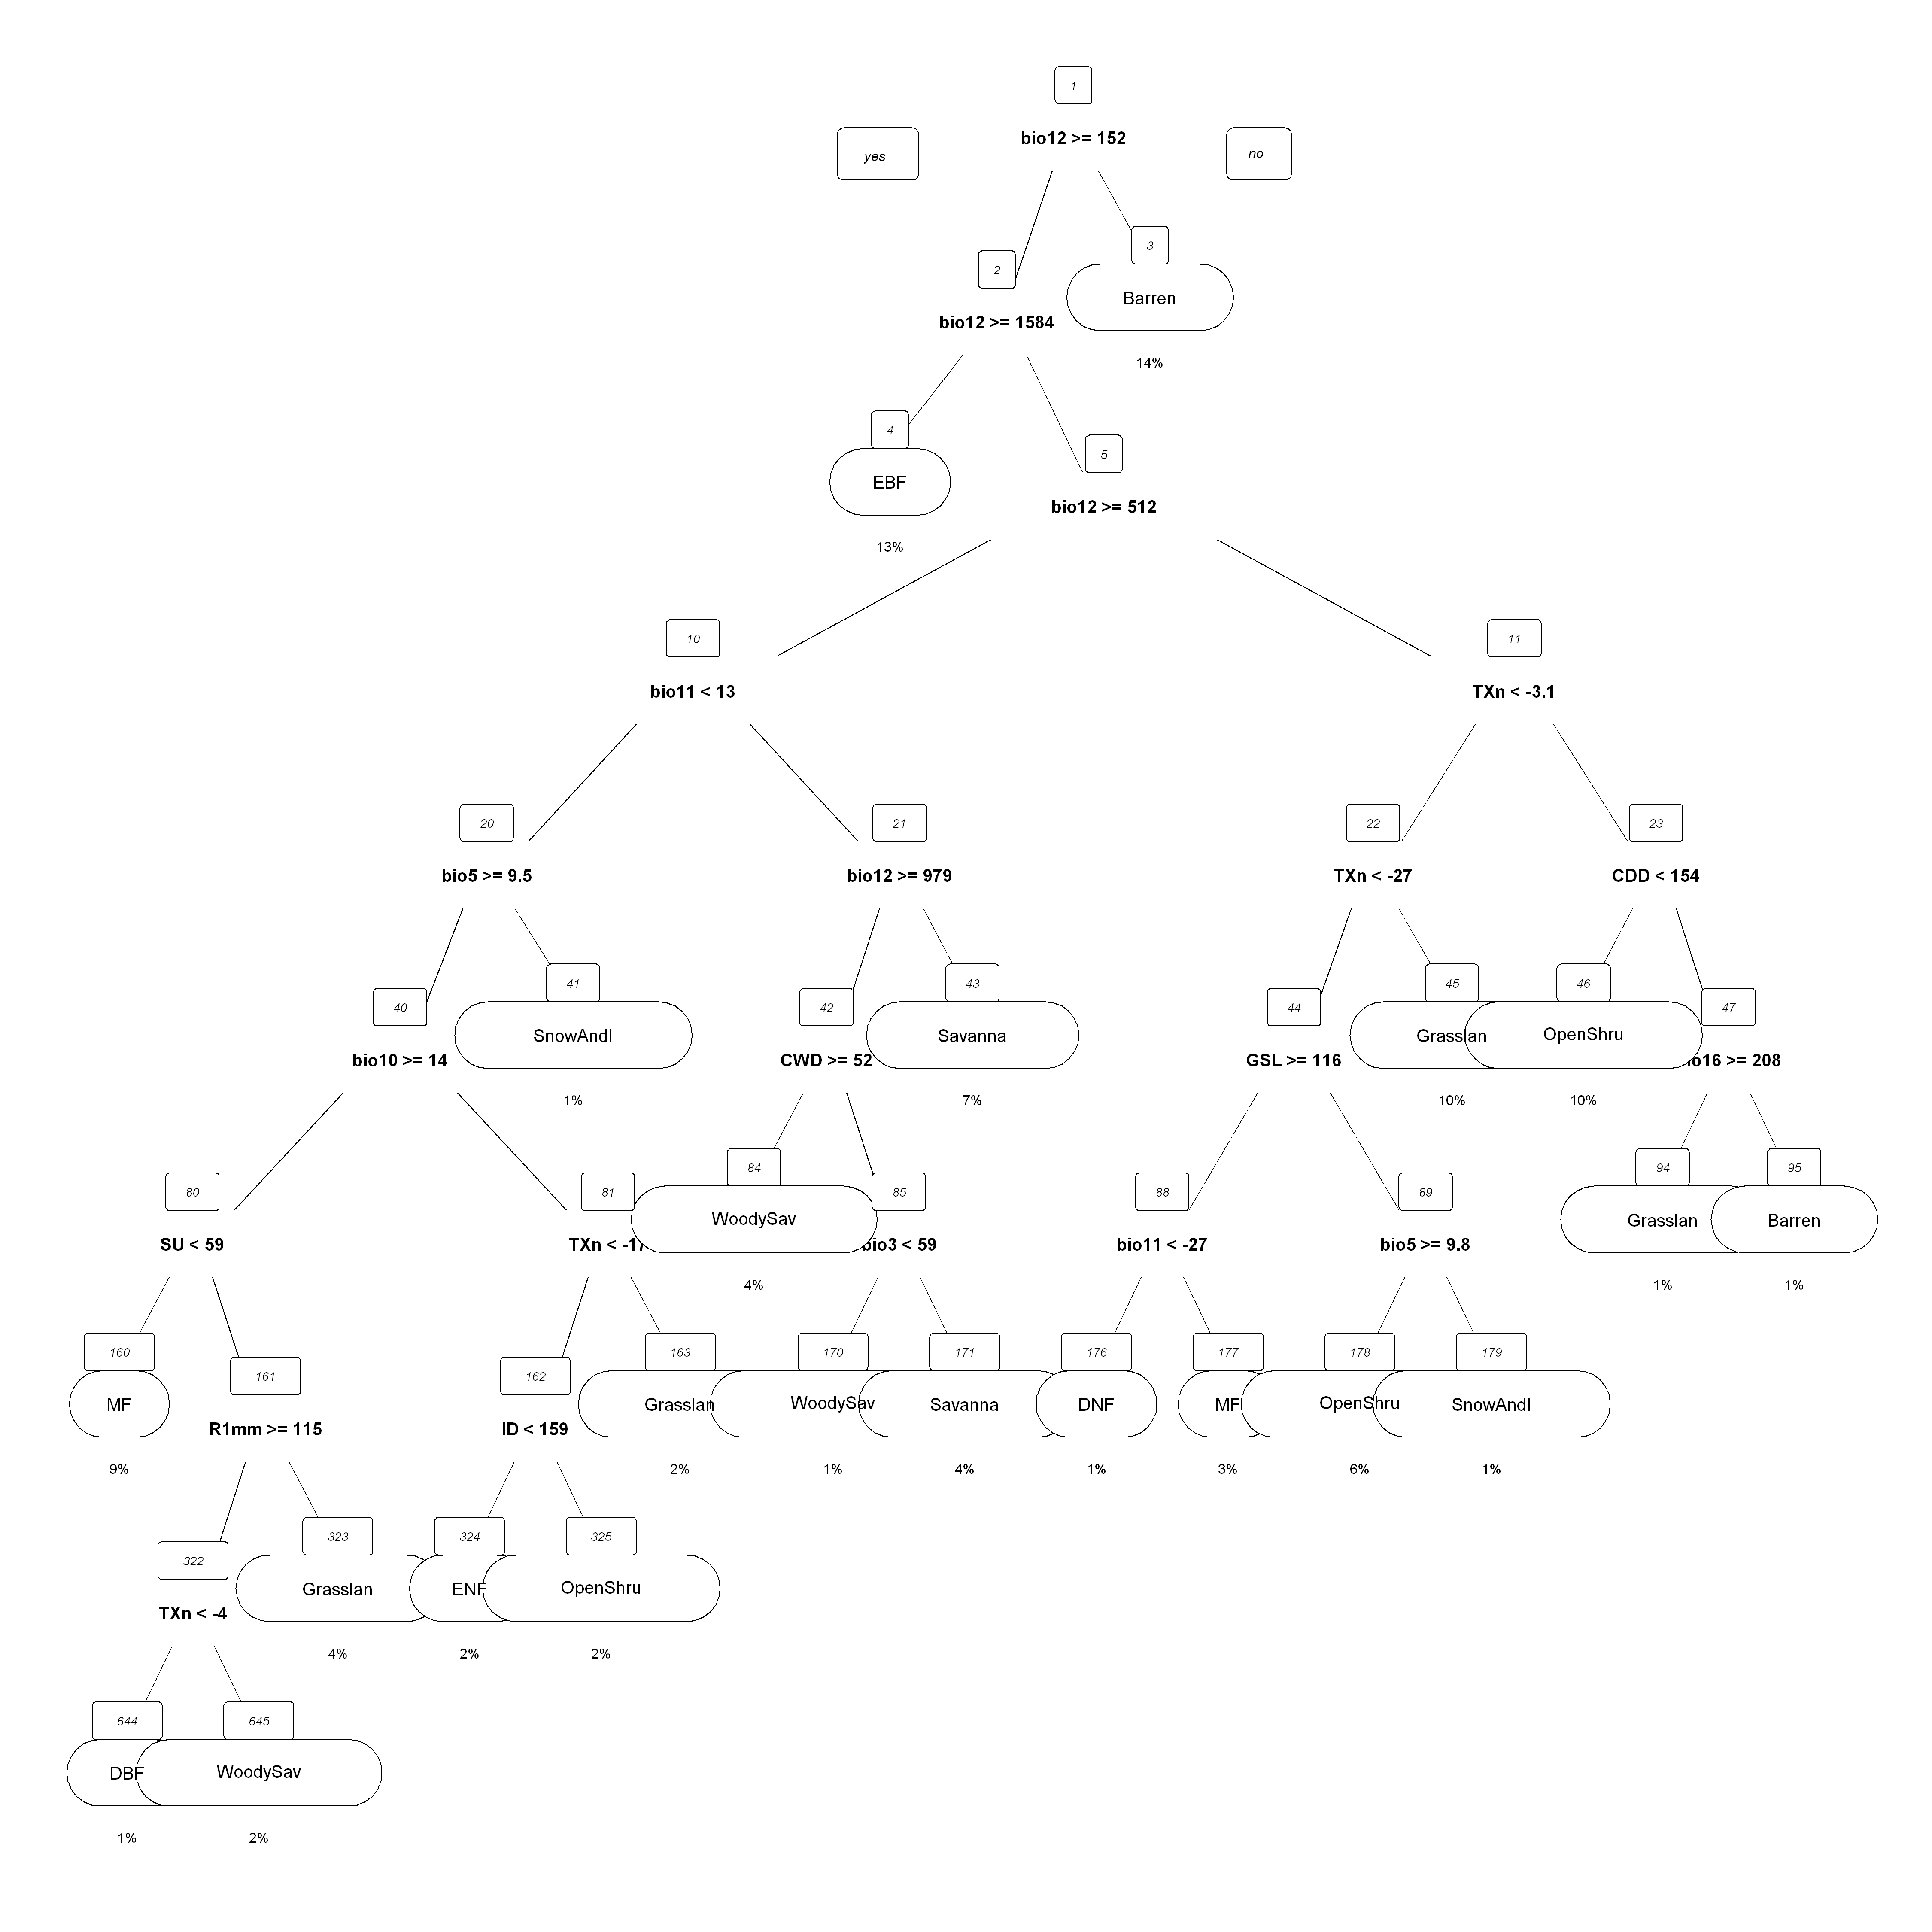

In [91]:
# Plotting the resulting decision tree with node numbers above each leaf (for examining the rules)
options(repr.plot.width=15, repr.plot.height=15)
prp(extreme.model, faclen=0, nn = T, extra=100, under=T, roundint=FALSE, tweak=1.8)


Coordinate system already present. Adding new coordinate system, which will replace the existing one.



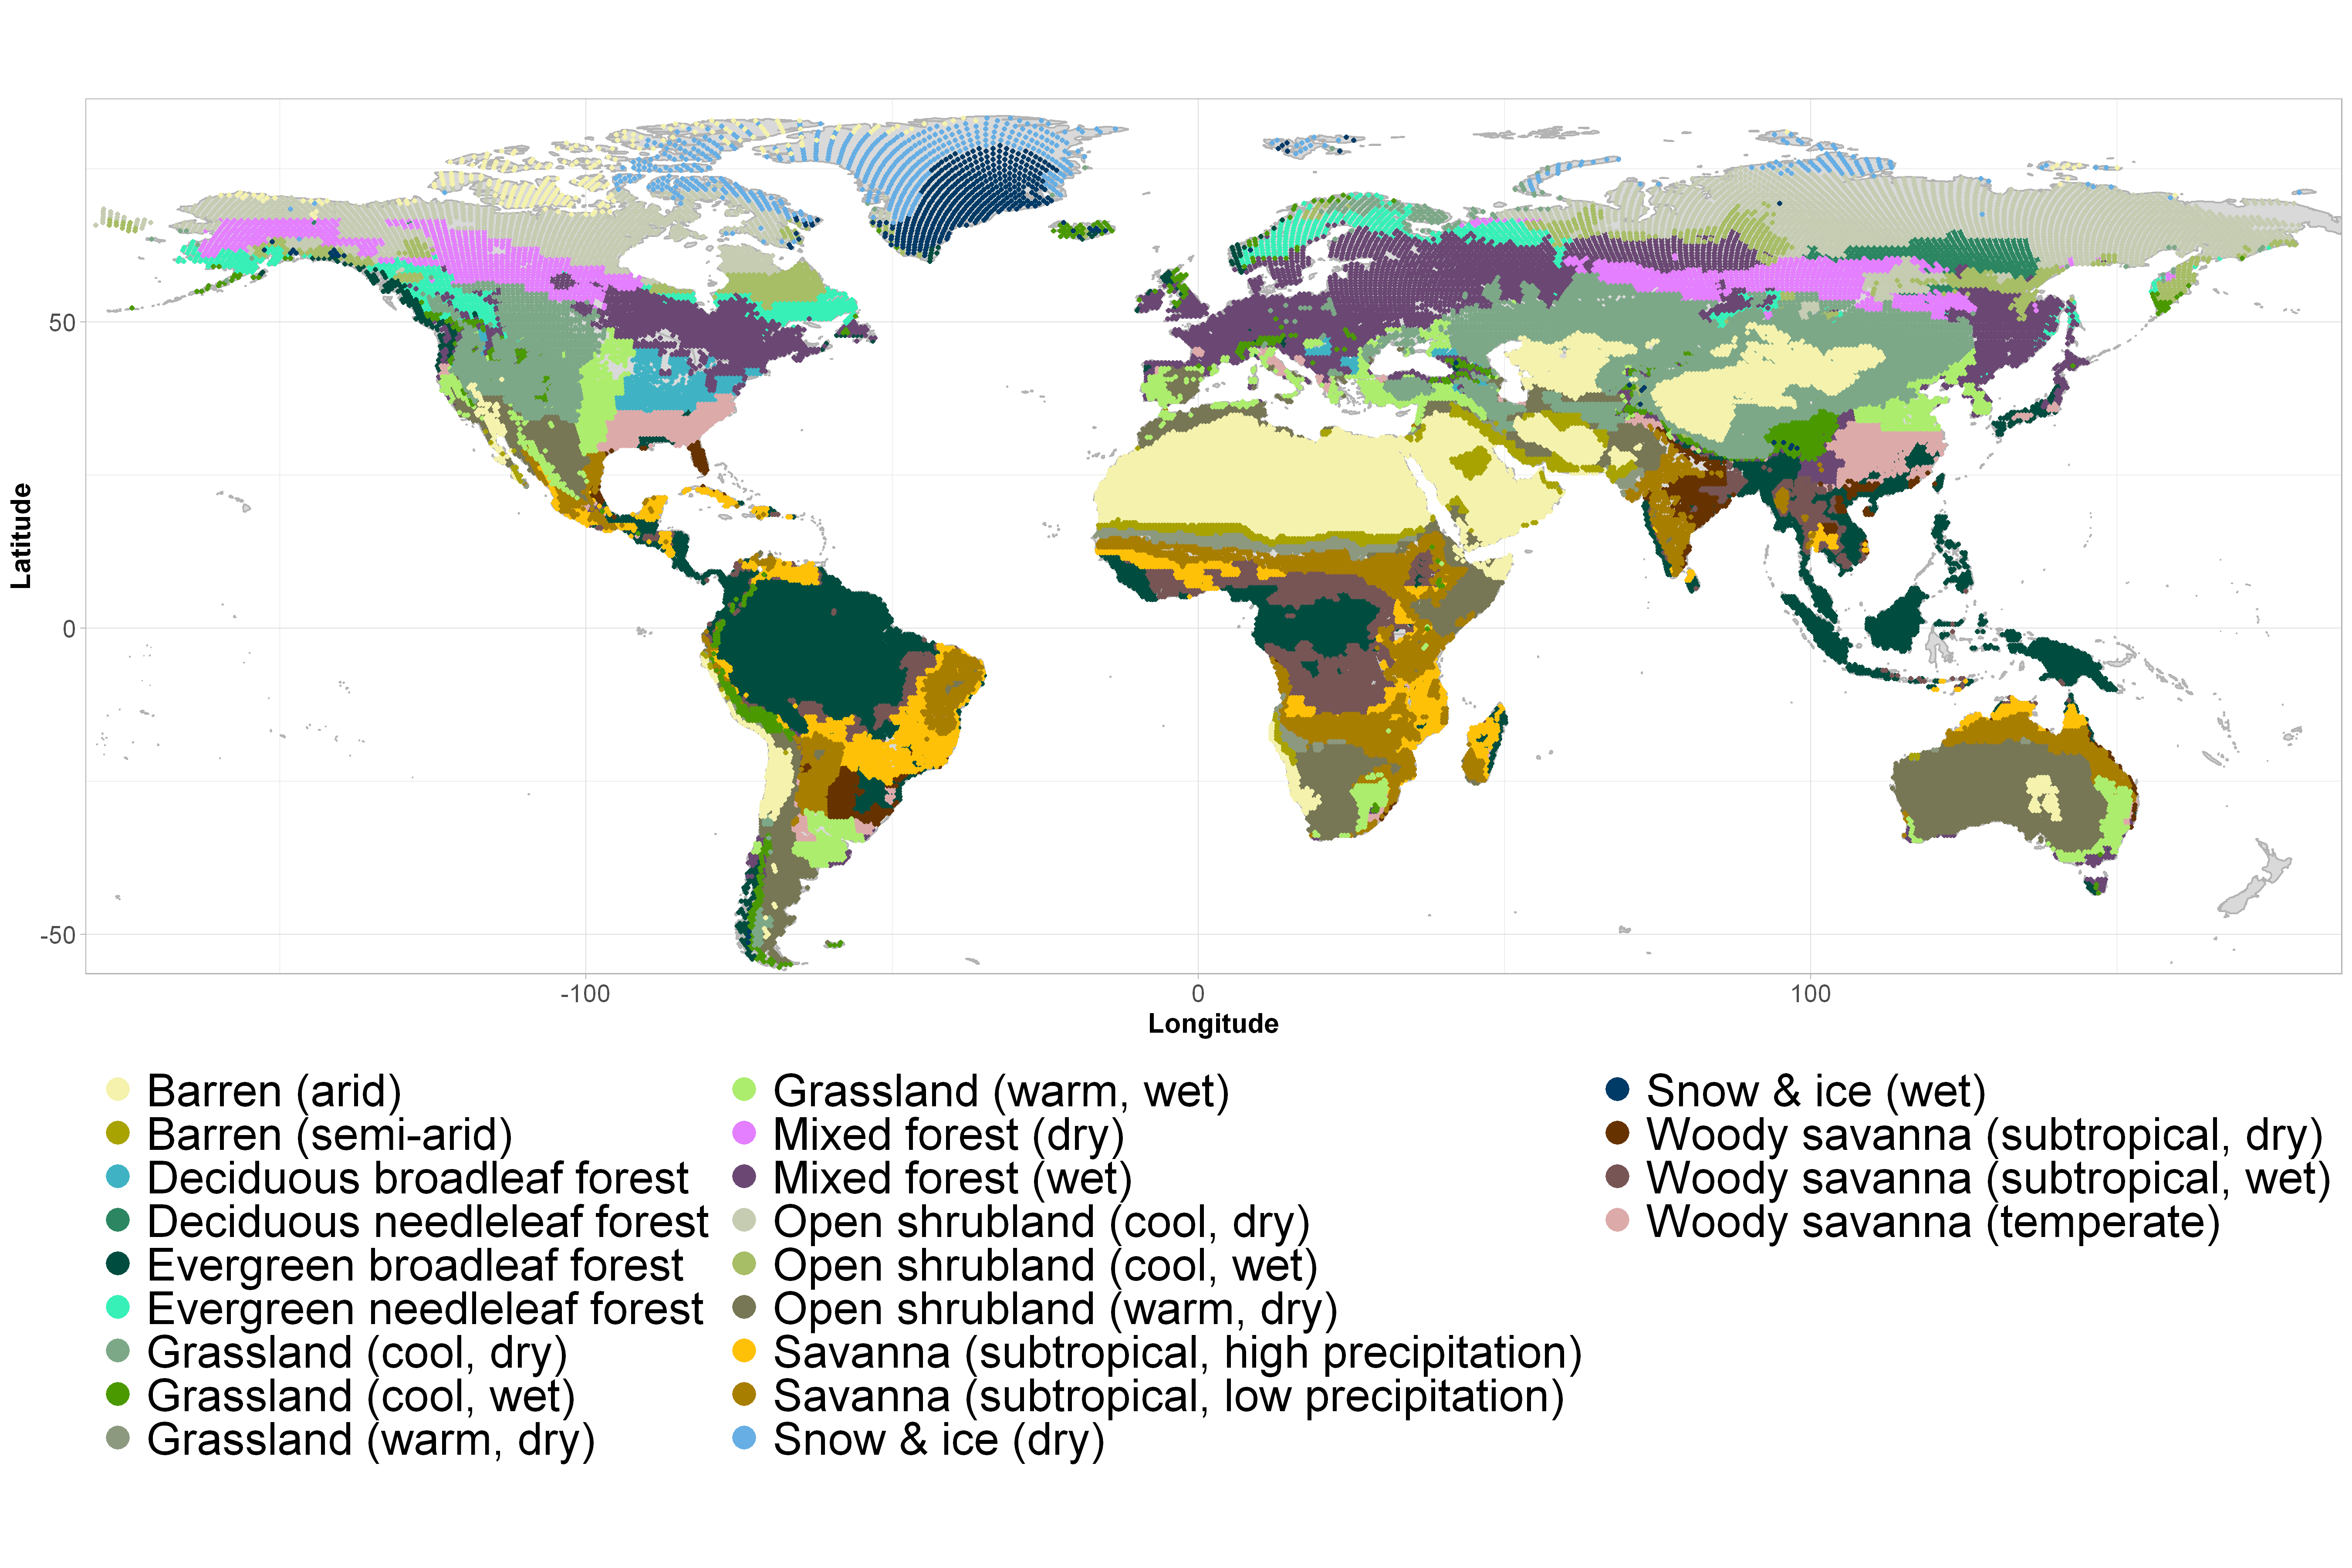

In [96]:
# Plotting a map of the extreme tree predictions of current data for each leaf node of the decision tree
# We find manually the node numbers from the tree plot above and use them to produce the map

options(repr.plot.width=18, repr.plot.height=12)

cols <- c("Evergreen broadleaf forest" ='#004D40',
          "Evergreen needleleaf forest"= '#37F0B8',
         'Deciduous needleleaf forest'= '#2B8661',
          'Deciduous broadleaf forest'= '#3FB3C3',
          'Mixed forest (wet)'= '#6A4873',
          'Mixed forest (dry)'= '#E47FFF',
          
          
          'Open shrubland (warm, dry)'= '#777755',
          'Open shrubland (cool, wet)'= '#A7BD66',
          'Open shrubland (cool, dry)'= '#C5CCB2',
          
          
       
          'Woody savanna (temperate)'='#DDAAAA',
          'Woody savanna (subtropical, wet)'= '#775555',
          'Woody savanna (subtropical, dry)'= '#663300',
          
          'Savanna (subtropical, low precipitation)'= '#A87E00',
          'Savanna (subtropical, high precipitation)'= '#FFC107',
          
          
          'Grassland (warm, wet)'= '#ADED6E',
          'Grassland (cool, wet)'= '#4B9900',
          'Grassland (warm, dry)'= '#8C997F',
          'Grassland (cool, dry)'= '#7DA888',
          
          
          
         
          'Snow & ice (wet)'= '#003A66',
          'Snow & ice (dry)'= '#66AEE4',
          
          'Barren (arid)'= '#F4F2AD',
           'Barren (semi-arid)' ='#A8A300',
         
          'Closed shrubland' ='#A07813',
          'Wetland' ='#848BB1'
         )
         


mapWorld <- map_data('world')
ggplot() +
geom_polygon(data = mapWorld, aes(x=long, y = lat, group = group), col='grey70', fill ='grey85') + coord_equal()+

geom_point(data = data_current[modis_nodes==324,], aes(x = lon, y = lat,colour="Evergreen needleleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==4,], aes(x = lon, y = lat, colour = "Evergreen broadleaf forest"),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==176,], aes(x = lon, y = lat, colour = 'Deciduous needleleaf forest'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==644,], aes(x = lon, y = lat, colour = 'Deciduous broadleaf forest'),shape=16, size = 1)+

geom_point(data = data_current[modis_nodes==160,], aes(x = lon, y = lat, colour = 'Mixed forest (wet)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==177,], aes(x = lon, y = lat, colour = 'Mixed forest (dry)'),shape=16, size = 1)+



geom_point(data = data_current[modis_nodes==46,], aes(x = lon, y = lat, colour = 'Open shrubland (warm, dry)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==178,], aes(x = lon, y = lat, colour = 'Open shrubland (cool, dry)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==325,], aes(x = lon, y = lat, colour = 'Open shrubland (cool, wet)'),shape=16, size = 1)+



geom_point(data = data_current[modis_nodes==645,], aes(x = lon, y = lat, colour =  'Woody savanna (temperate)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==84,], aes(x = lon, y = lat, colour = 'Woody savanna (subtropical, wet)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==170,], aes(x = lon, y = lat, colour ='Woody savanna (subtropical, dry)'),shape=16, size = 1)+





geom_point(data = data_current[modis_nodes==171,], aes(x = lon, y = lat, colour = 'Savanna (subtropical, high precipitation)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==43,], aes(x = lon, y = lat, colour ='Savanna (subtropical, low precipitation)'),shape=16, size = 1)+



geom_point(data = data_current[modis_nodes==323,], aes(x = lon, y = lat, colour = 'Grassland (warm, wet)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==163,], aes(x = lon, y = lat, colour = 'Grassland (cool, wet)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==94,], aes(x = lon, y = lat, colour = 'Grassland (warm, dry)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==45,], aes(x = lon, y = lat, colour = 'Grassland (cool, dry)'),shape=16, size = 1)+




geom_point(data = data_current[modis_nodes==41,], aes(x = lon, y = lat, colour = 'Snow & ice (wet)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==179,], aes(x = lon, y = lat, colour = 'Snow & ice (dry)'),shape=16, size = 1)+

geom_point(data = data_current[modis_nodes==3,], aes(x = lon, y = lat, colour = 'Barren (arid)'),shape=16, size = 1)+
geom_point(data = data_current[modis_nodes==95,], aes(x = lon, y = lat, colour ='Barren (semi-arid)'),shape=16, size = 1)+



ylab('Latitude')+
xlab('Longitude')+
theme_light()+
coord_fixed(xlim = c(-165, 170), ylim = c(-50, 80)) +
scale_colour_manual(name="",values=cols)+ theme(plot.title = element_text(hjust = 0.5,size = 30, face = "bold"),
                                                legend.position="bottom")+
theme(axis.text=element_text(size=14), axis.title=element_text(size=15,face="bold")) + 
theme(legend.text=element_text(size=25), legend.title=element_text(size=14)) + 
guides(colour = guide_legend(nrow = 9, byrow = FALSE,override.aes = list(shape = 16,size=6)))

